In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')


In [2]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


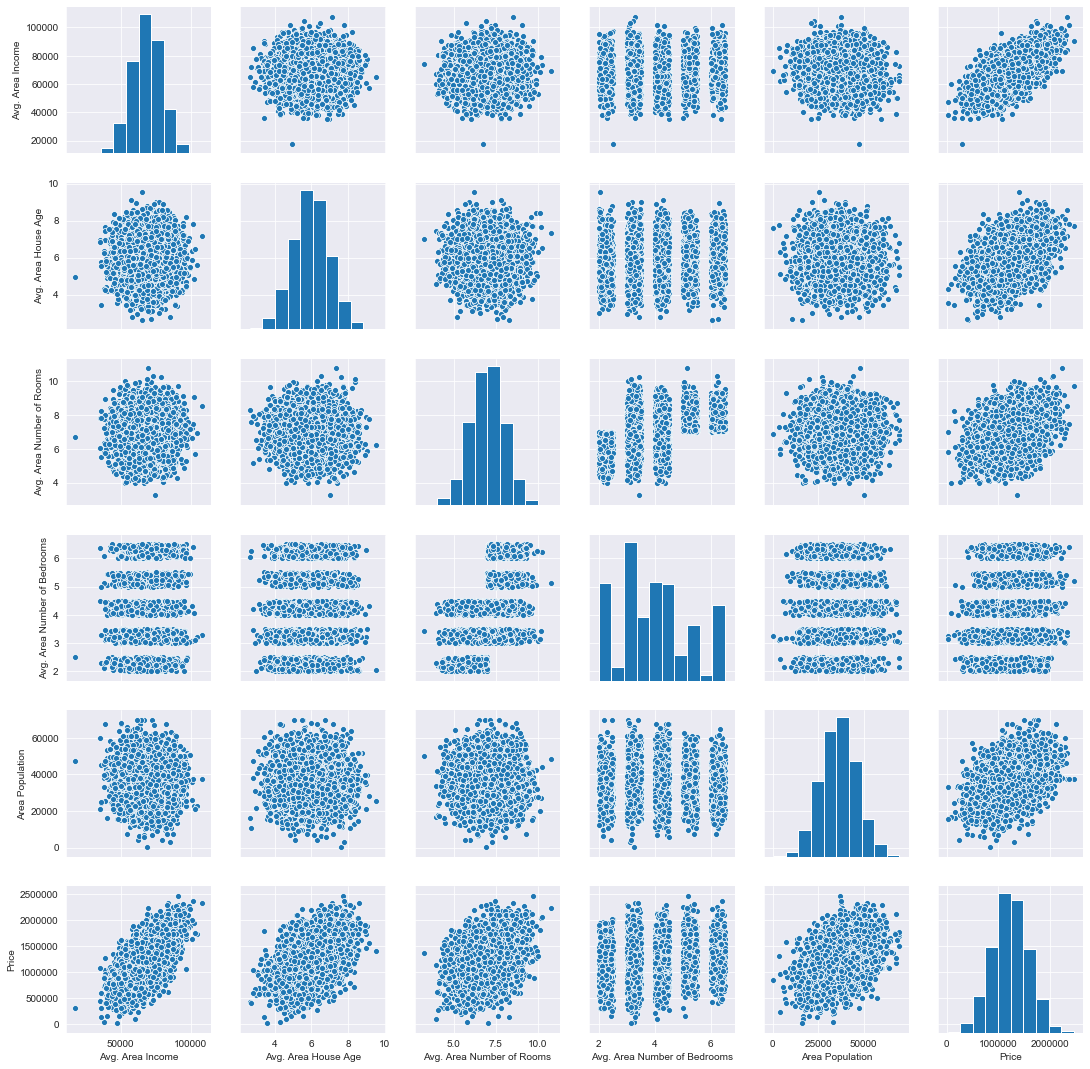

In [3]:
sns.pairplot(df)

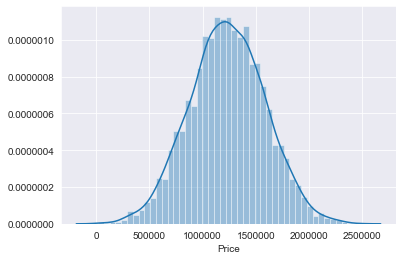

In [4]:
sns.distplot(df['Price'])

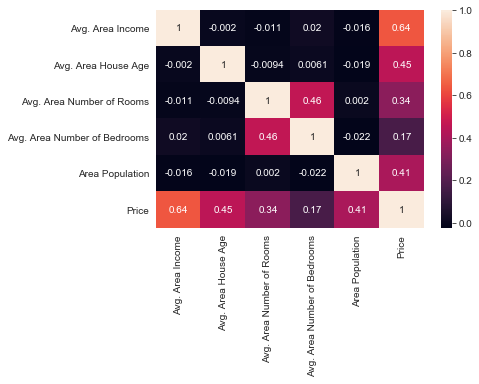

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [25]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [11]:
y = df['Price']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(lm.intercept_)

-2640159.796852679


In [33]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [34]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [36]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [39]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [42]:
predictions = lm.predict(X_test)
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140899, 1914519.5417888 ])

In [43]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
2866    7.300436e+05
2371    1.166925e+06
2952    7.054441e+05
45      1.499989e+06
4653    1.288199e+06
891     1.441737e+06
3011    1.279681e+06
335     1.754969e+06
3050    1.511653e+06
3850    1.441956e+06
834     1.119993e+06
3188    7.278665e+05
4675    1.138885e+06
2564    1.074263e+06
1866    1.386473e+06
1492    4.046436e+05
3720    1.449829e+06
618     1.775875e+06
3489    1.202051e+06
2145    1.105737e+06
3200    1.835565e+06
4752    1.795429e+06
602     1.424283e+06
4665    1.365945e+06
79      1.492011e+06
            ...     
4668    1.537865e+06
3762    4.269062e+05
236     8.090897e+05
4897    1.169265e+06
1283    9.809832e+05
2443    5.491679e+05
3600    8.238644e+05
2138    1.467960e+06
254     8.224317e+05
3987    1.550931e+06
527     1.293747e+06
1362    7.582626e+05
4577    1.479063e+06
2642    1.759180e+06
4297    1.864670e+06
1114    1.569122e+06
1041    1.610

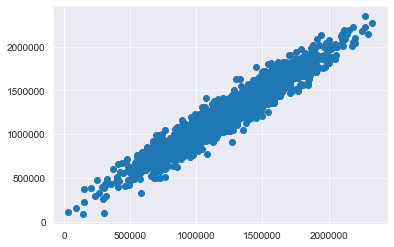

In [44]:
plt.scatter(y_test,predictions)

sns.distplot((y_test-predictions))

In [46]:
from sklearn import metrics

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914951
MSE: 10460958907.208992
RMSE: 102278.82922290904
